### PAIR VIII MÓDULO 3: Encoding

Para los ejercicios de Pair hemos utilizado el siguiente dataset: [Spotify Tracks Dataset](https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset)

In [10]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import RobustScaler
from scipy.stats import kstest
from sklearn.preprocessing import OrdinalEncoder

import warnings
warnings.filterwarnings('ignore')

Vuestro set de datos debería tener al menos una variable categórica, el objetivo del pair programming de hoy:
- Hacer una códificación de la/las variables categóricas que tengáis en vuestro set de datos.
- Recordad que lo primero que deberéis hacer es decidir su vuestras variables tienen o no orden, para que en función de esto uséis una aproximación u otra.
- Guardad el dataframe, donde deberíais tener las variables estadandarizas, normalizadas y codificadas en un csv para usarlo en el próximo pairprogramming

In [11]:
df = pd.read_pickle('data/spotify_songs_estandarizado.pkl')
df.head(2)

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,18,-0.184255,False,-0.157447,0.025974,C,-0.153345,minor,4.038855,-0.065621,-0.000916,0.100897,-0.102381,-0.853817,compas_4
1,58,-0.832951,False,0.612766,-0.194805,G,0.225755,major,7.351738,-0.116098,-0.000916,-0.266256,-0.038095,1.927569,compas_4


Vamos a comprobar cómo se distribuye "popularidad" en base a cada una de nuestras variables categóricas:

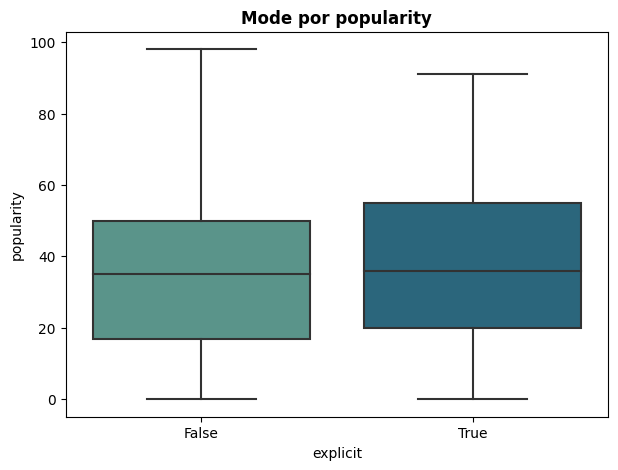

In [14]:
plt.figure(figsize = (7, 5))
sns.boxplot(y= 'popularity', x= 'explicit', data= df, palette= 'crest')
plt.title('Mode por popularity', fontweight='bold');

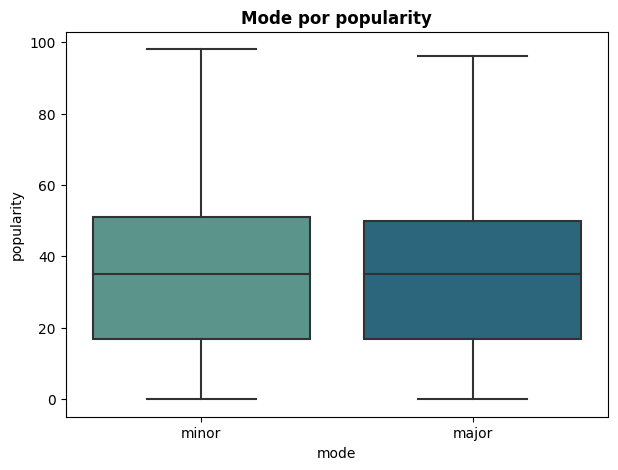

In [15]:
plt.figure(figsize = (7, 5))
sns.boxplot(y= 'popularity', x= 'mode', data= df, palette= 'crest')
plt.title('Mode por popularity', fontweight='bold');

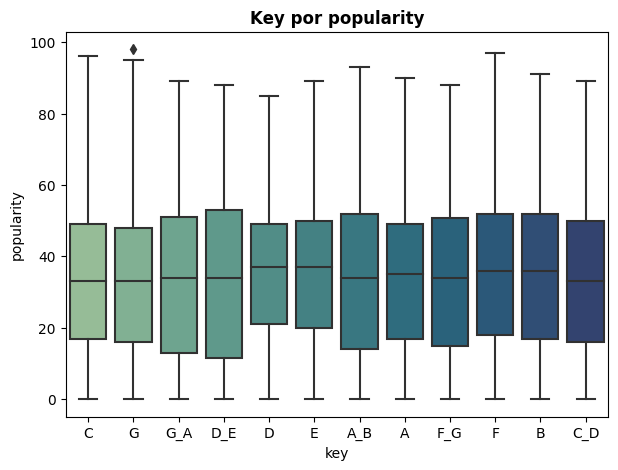

In [16]:
plt.figure(figsize = (7, 5))
sns.boxplot(y= 'popularity', x= 'key', data= df, palette= 'crest')
plt.title('Key por popularity', fontweight='bold');

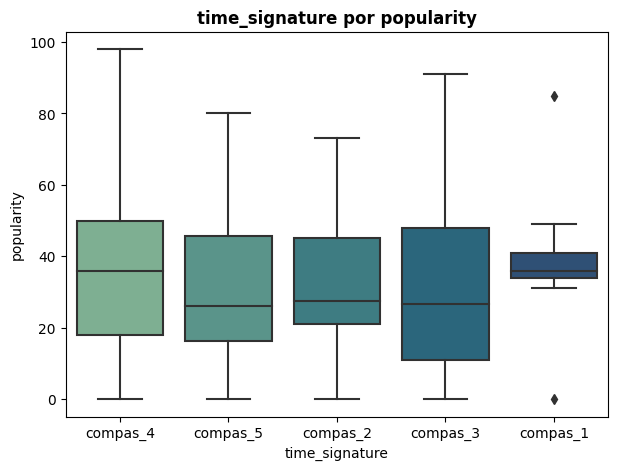

In [17]:
plt.figure(figsize = (7, 5))
sns.boxplot(y= 'popularity', x= 'time_signature', data= df, palette= 'crest')
plt.title('time_signature por popularity', fontweight='bold');

CONCLUSIONES:

Ninguna de nuestras cuatro variables categóricas tiene orden.

Vamos a codificar todas con get_dummies:

In [18]:
categoricas = df.select_dtypes(include = ["O", "bool"]).columns
categoricas 

Index(['explicit', 'key', 'mode', 'time_signature'], dtype='object')

In [19]:
for col in categoricas:
    dummies = pd.get_dummies(df[col], prefix_sep = "_", prefix = "owners", dtype = int)
    df = pd.concat([df, dummies], axis= 1)
    df.drop(col, axis= 1, inplace= True)

Lo guardamos:

In [20]:
df.to_pickle('data/spotify_songs_estandarizado_encoding.pkl')